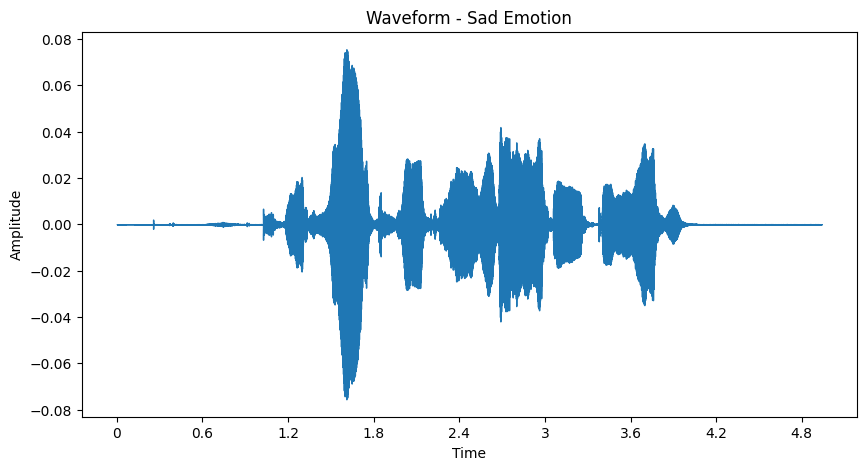

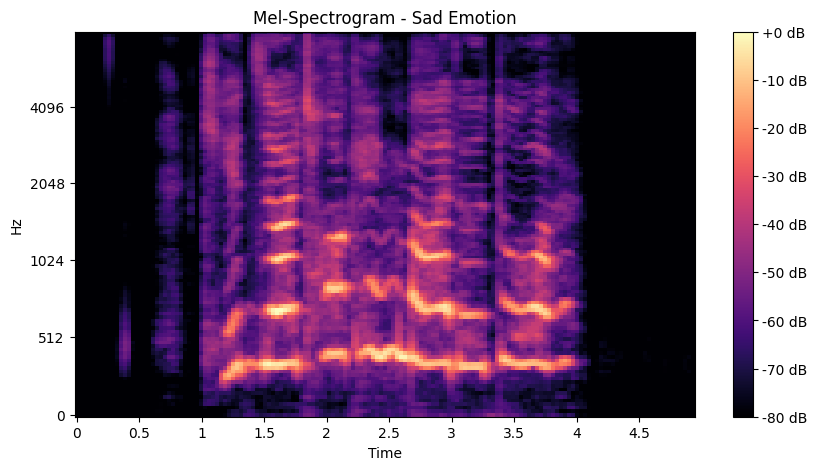

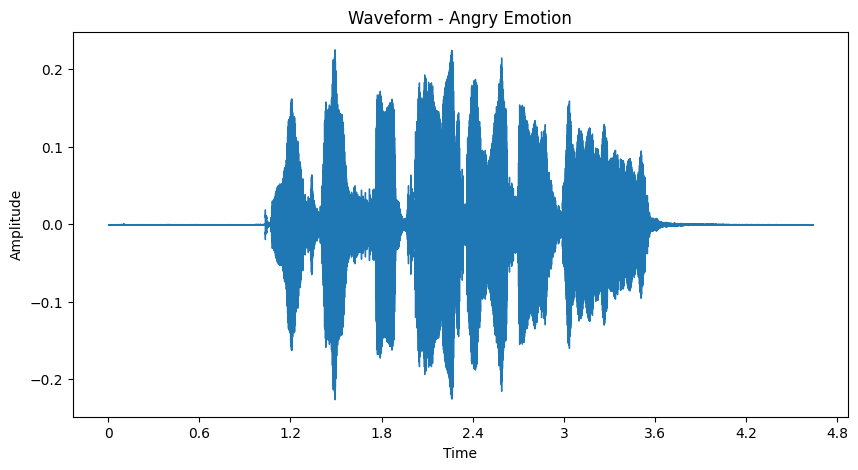

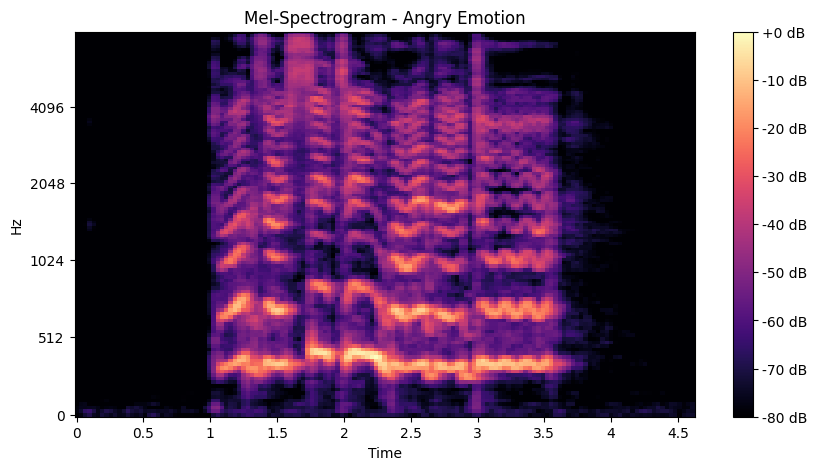

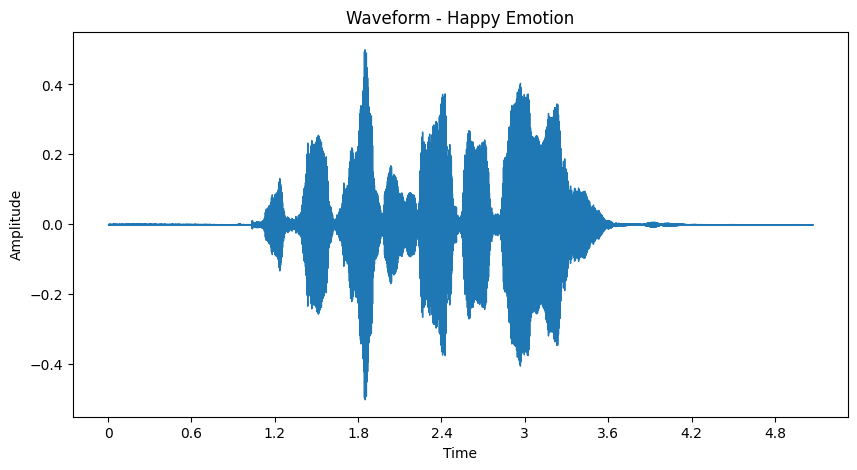

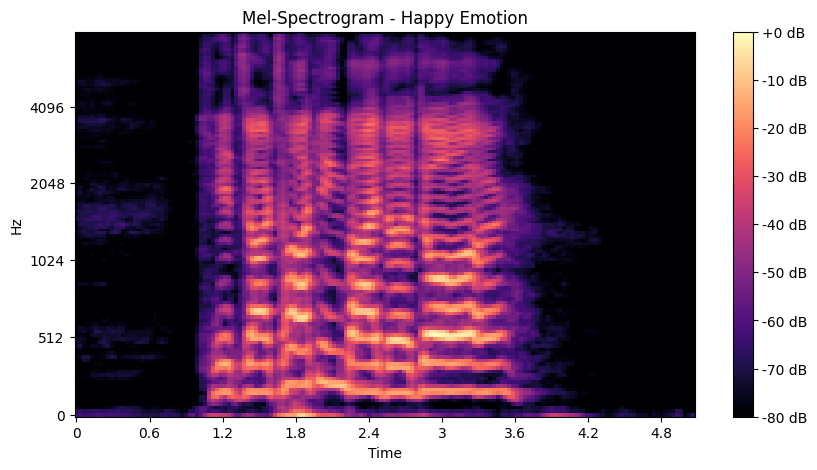

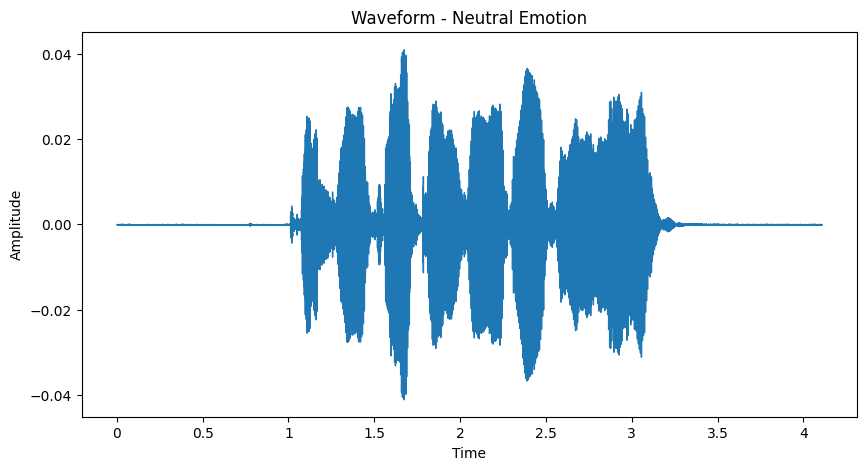

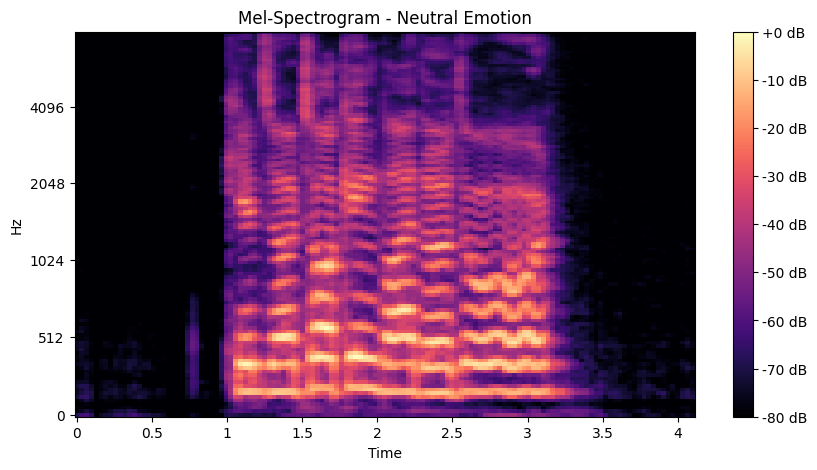

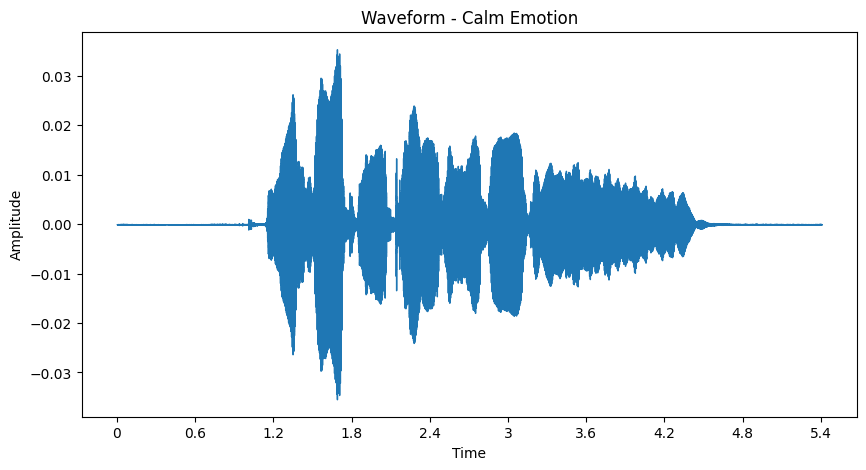

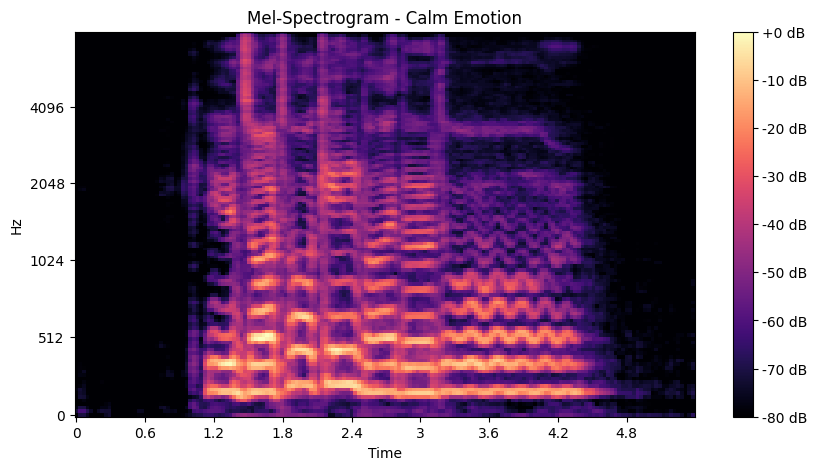

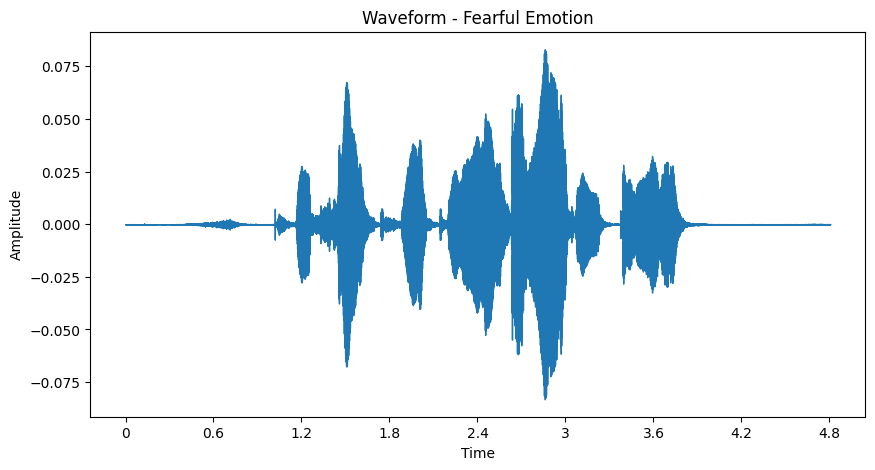

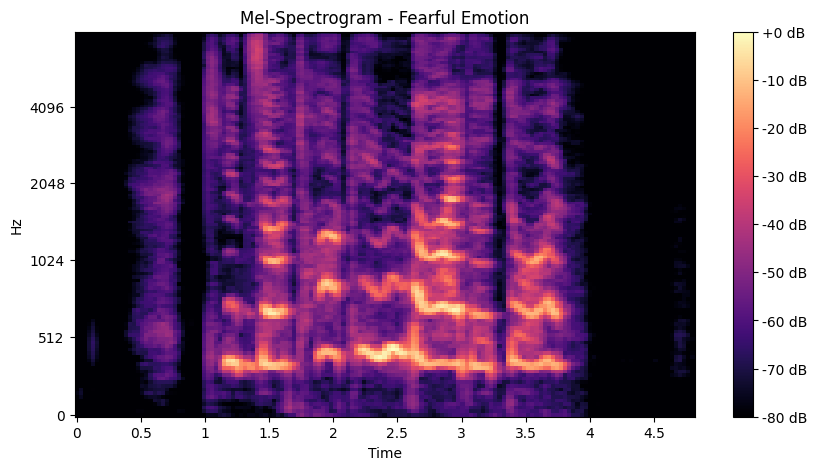

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from omegaconf import OmegaConf
#
# Load config
cfg = OmegaConf.load('../configs/config.yaml')
DATA_DIR = cfg.data.train_dir
SAMPLE_RATE = cfg.data.sample_rate
N_MELS = cfg.data.n_mels
FIG_SIZE = (10, 5)
#
# Define emotions and their IDs
emotions = {
    'neutral': '01',
    'calm': '02',
    'happy': '03',
    'sad': '04',
    'angry': '05',
    'fearful': '06',
    'surprise': '07',
    'disgust': '08'
}
#
# Find one file per emotion#
emotion_files = {}
for file in os.listdir(DATA_DIR):
    if file.endswith('.wav'):
        emotion_id = file.split('-')[2]
        for emotion, eid in emotions.items():
            if emotion_id == eid and emotion not in emotion_files:
                emotion_files[emotion] = file
                break
#
# Visualize each emotion#
for emotion, file_name in emotion_files.items():
    file_path = os.path.join(DATA_DIR, file_name)
    #
    # Load audio
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    #
    # Plot waveform
    plt.figure(figsize=FIG_SIZE)
    librosa.display.waveshow(signal, sr=SAMPLE_RATE)
    plt.title(f'Waveform - {emotion.capitalize()} Emotion')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    #
    # Compute and plot mel-spectrogram#
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=SAMPLE_RATE, n_mels=N_MELS)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    #
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(mel_spec_db, sr=SAMPLE_RATE, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram - {emotion.capitalize()} Emotion')
    plt.show()